In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
drought_states=pd.read_csv('./data_dc/final_merged.csv')

In [2]:
# #reading dataset
# drought_states = pd.read_csv('./data_dc/final_merged.csv')

In [5]:
drought_states.head()

ValidEnd     Name state  area_none   area_d0  area_d1  area_d2  area_d3  \
0  2021-01-04  Alabama    AL   47712.19   3892.15      0.0      0.0      0.0   
1  2020-12-28  Alabama    AL   39068.95  12535.39      0.0      0.0      0.0   
2  2020-12-21  Alabama    AL   39068.95  12535.40      0.0      0.0      0.0   
3  2020-12-14  Alabama    AL   42812.87   8791.48      0.0      0.0      0.0   
4  2020-12-07  Alabama    AL   45608.51   5995.84      0.0      0.0      0.0   

   area_d4  population_none  ...  population_d2  population_d3  population_d4  \
0      0.0       4596699.61  ...            0.0            0.0            0.0   
1      0.0       4038013.82  ...            0.0            0.0            0.0   
2      0.0       4038013.43  ...            0.0            0.0            0.0   
3      0.0       4239664.15  ...            0.0            0.0            0.0   
4      0.0       4483976.48  ...            0.0            0.0            0.0   

   DSCI  total_area  total_population   avg_tmax   avg_tmin  \
0     8    51604.34        4779736.02  67.940000  41.450000   
1    24    51604.34        4779736.02  57.797143  30.522857   
2    24    51604.35        4779736.02  53.634286  34.314286   
3    17    51604.35        4779736.02  64.145714  38.808571   
4    12    51604.35        4779736.02  55.377143  31.965714   

   total_avg_prcp_inches  total_avg_prcp_mm  
0                  0.000             0.0000  
1                  1.440            36.5760  
2                  0.354             8.9916  
3                  1.236            31.3944  
4                  0.852            21.6408  

[5 rows x 22 columns]

In [8]:
drought_states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47025 entries, 0 to 47024
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ValidEnd               47025 non-null  object 
 1   Name                   47025 non-null  object 
 2   state                  47025 non-null  object 
 3   area_none              47025 non-null  float64
 4   area_d0                47025 non-null  float64
 5   area_d1                47025 non-null  float64
 6   area_d2                47025 non-null  float64
 7   area_d3                47025 non-null  float64
 8   area_d4                47025 non-null  float64
 9   population_none        47025 non-null  float64
 10  population_d0          47025 non-null  float64
 11  population_d1          47025 non-null  float64
 12  population_d2          47025 non-null  float64
 13  population_d3          47025 non-null  float64
 14  population_d4          47025 non-null  float64
 15  DS

### Add 9 drought regions column

In [9]:
# Create keys from list, with one common value.
oh='Ohio Valley'
ohio_valley=dict.fromkeys(['Illinois','Indiana','Kentucky','Missouri',
             'Ohio','Tennessee','West Virginia'],oh)
#https://stackoverflow.com/questions/11977730/creating-a-dictionary-with-same-values
ohio_valley


{'Illinois': 'Ohio Valley',
 'Indiana': 'Ohio Valley',
 'Kentucky': 'Ohio Valley',
 'Missouri': 'Ohio Valley',
 'Ohio': 'Ohio Valley',
 'Tennessee': 'Ohio Valley',
 'West Virginia': 'Ohio Valley'}

In [10]:
oh_list=['Illinois','Indiana','Kentucky','Missouri',
             'Ohio','Tennessee','West Virginia']

In [11]:
def state_region_dict(list_states,string_region):
    return dict.fromkeys(list_states,string_region)
#function to combine states and region into dictionary by using code for ohio_valley
#needs list of states and the string(region)

In [12]:
um_list=['Iowa', 'Michigan', 'Minnesota', 'Wisconsin']
um_region='Upper Midwest'
upper_midwest=state_region_dict(um_list,um_region)
upper_midwest

{'Iowa': 'Upper Midwest',
 'Michigan': 'Upper Midwest',
 'Minnesota': 'Upper Midwest',
 'Wisconsin': 'Upper Midwest'}

In [13]:
ne_list=['Connecticut','Delaware','Maine','Maryland','Massachusetts', 'New Hampshire', 'New Jersey',
        'New York', 'Pennsylvania','Rhode Island','Vermont']
ne_region='Northeast'
north_east=state_region_dict(ne_list,ne_region)
north_east

{'Connecticut': 'Northeast',
 'Delaware': 'Northeast',
 'Maine': 'Northeast',
 'Maryland': 'Northeast',
 'Massachusetts': 'Northeast',
 'New Hampshire': 'Northeast',
 'New Jersey': 'Northeast',
 'New York': 'Northeast',
 'Pennsylvania': 'Northeast',
 'Rhode Island': 'Northeast',
 'Vermont': 'Northeast'}

In [14]:
nw_list=['Idaho','Oregon','Washington']
nw_region='Northwest'
north_west=state_region_dict(nw_list,nw_region)

s_list=['Arkansas','Kansas','Louisiana','Mississippi','Oklahoma','Texas']
s_region='South'
south=state_region_dict(s_list,s_region)

se_list=['Alabama','Florida','Georgia','North Carolina','South Carolina','Virginia']
se_region='Southeast'
south_east=state_region_dict(se_list,se_region)

sw_list=['Arizona','Colorado','New Mexico','Utah']
sw_region='Southwest'
south_west=state_region_dict(sw_list,sw_region)

w_list=['California','Nevada']
w_region='West'
west=state_region_dict(w_list,w_region)

wnc_list=['Montana','Nebraska','North Dakota','South Dakota','Wyoming']
wnc_region='Northern Rockies and Plains'
northern_rockies=state_region_dict(wnc_list,wnc_region)

In [15]:
final_dict={**ohio_valley,**upper_midwest,**north_east,**north_west,**south,
            **south_east,**south_west,**west,**northern_rockies}
final_dict
#combine multiple dictionaries into one 
#https://towardsdatascience.com/merge-dictionaries-in-python-d4e9ce137374

{'Illinois': 'Ohio Valley',
 'Indiana': 'Ohio Valley',
 'Kentucky': 'Ohio Valley',
 'Missouri': 'Ohio Valley',
 'Ohio': 'Ohio Valley',
 'Tennessee': 'Ohio Valley',
 'West Virginia': 'Ohio Valley',
 'Iowa': 'Upper Midwest',
 'Michigan': 'Upper Midwest',
 'Minnesota': 'Upper Midwest',
 'Wisconsin': 'Upper Midwest',
 'Connecticut': 'Northeast',
 'Delaware': 'Northeast',
 'Maine': 'Northeast',
 'Maryland': 'Northeast',
 'Massachusetts': 'Northeast',
 'New Hampshire': 'Northeast',
 'New Jersey': 'Northeast',
 'New York': 'Northeast',
 'Pennsylvania': 'Northeast',
 'Rhode Island': 'Northeast',
 'Vermont': 'Northeast',
 'Idaho': 'Northwest',
 'Oregon': 'Northwest',
 'Washington': 'Northwest',
 'Arkansas': 'South',
 'Kansas': 'South',
 'Louisiana': 'South',
 'Mississippi': 'South',
 'Oklahoma': 'South',
 'Texas': 'South',
 'Alabama': 'Southeast',
 'Florida': 'Southeast',
 'Georgia': 'Southeast',
 'North Carolina': 'Southeast',
 'South Carolina': 'Southeast',
 'Virginia': 'Southeast',
 'Arizona

In [16]:
print(len(final_dict.keys()))

48


In [17]:
drought_states['climate_regions']=drought_states['Name']

In [18]:
#Replaced initial values with dictionary region values
drought_states.replace({'climate_regions':final_dict},inplace=True)
#https://sparkbyexamples.com/pandas/pandas-remap-values-in-column-with-a-dictionary-dict/

In [19]:
drought_states.head()

ValidEnd     Name state  area_none   area_d0  area_d1  area_d2  area_d3  \
0  2021-01-04  Alabama    AL   47712.19   3892.15      0.0      0.0      0.0   
1  2020-12-28  Alabama    AL   39068.95  12535.39      0.0      0.0      0.0   
2  2020-12-21  Alabama    AL   39068.95  12535.40      0.0      0.0      0.0   
3  2020-12-14  Alabama    AL   42812.87   8791.48      0.0      0.0      0.0   
4  2020-12-07  Alabama    AL   45608.51   5995.84      0.0      0.0      0.0   

   area_d4  population_none  ...  population_d3  population_d4  DSCI  \
0      0.0       4596699.61  ...            0.0            0.0     8   
1      0.0       4038013.82  ...            0.0            0.0    24   
2      0.0       4038013.43  ...            0.0            0.0    24   
3      0.0       4239664.15  ...            0.0            0.0    17   
4      0.0       4483976.48  ...            0.0            0.0    12   

   total_area  total_population   avg_tmax   avg_tmin  total_avg_prcp_inches  \
0    51604.34        4779736.02  67.940000  41.450000                  0.000   
1    51604.34        4779736.02  57.797143  30.522857                  1.440   
2    51604.35        4779736.02  53.634286  34.314286                  0.354   
3    51604.35        4779736.02  64.145714  38.808571                  1.236   
4    51604.35        4779736.02  55.377143  31.965714                  0.852   

   total_avg_prcp_mm  climate_regions  
0             0.0000        Southeast  
1            36.5760        Southeast  
2             8.9916        Southeast  
3            31.3944        Southeast  
4            21.6408        Southeast  

[5 rows x 23 columns]

In [20]:
drought_states.tail()

ValidEnd     Name state  area_none   area_d0  area_d1  area_d2  \
47020  2001-01-29  Wyoming    WY   19865.21  77933.41      0.0      0.0   
47021  2001-01-22  Wyoming    WY   69093.43  28705.19      0.0      0.0   
47022  2001-01-15  Wyoming    WY   69093.43  28705.19      0.0      0.0   
47023  2001-01-08  Wyoming    WY   40340.46  57458.16      0.0      0.0   
47024  2001-01-01  Wyoming    WY   40340.46  57458.16      0.0      0.0   

       area_d3  area_d4  population_none  ...  population_d3  population_d4  \
47020      0.0      0.0        141431.33  ...            0.0            0.0   
47021      0.0      0.0        415072.66  ...            0.0            0.0   
47022      0.0      0.0        415072.66  ...            0.0            0.0   
47023      0.0      0.0        287015.91  ...            0.0            0.0   
47024      0.0      0.0        287015.91  ...            0.0            0.0   

       DSCI  total_area  total_population   avg_tmax   avg_tmin  \
47020    80    97798.62          563626.0  28.571429  11.928571   
47021    29    97798.62          563626.0  28.000000   9.285714   
47022    29    97798.62          563626.0  34.642857  14.142857   
47023    59    97798.62          563626.0  40.285714  17.785714   
47024    59    97798.62          563626.0  33.000000   7.000000   

       total_avg_prcp_inches  total_avg_prcp_mm              climate_regions  
47020                  0.115              2.921  Northern Rockies and Plains  
47021                  0.085              2.159  Northern Rockies and Plains  
47022                  0.070              1.778  Northern Rockies and Plains  
47023                  0.000              0.000  Northern Rockies and Plains  
47024                  0.005              0.127  Northern Rockies and Plains  

[5 rows x 23 columns]

In [21]:
drought_states['climate_regions'].value_counts()

Northeast                      8360
Ohio Valley                    7315
South                          6270
Southeast                      6270
Northern Rockies and Plains    5225
Upper Midwest                  4180
Southwest                      4180
Northwest                      3135
West                           2090
Name: climate_regions, dtype: int64

In [22]:
drought_states=drought_states[drought_states['climate_regions'].str.contains('Alaska')==False]
drought_states=drought_states[drought_states['climate_regions'].str.contains('District of Columbia')==False]
drought_states=drought_states[drought_states['climate_regions'].str.contains('Hawaii')==False]
drought_states=drought_states[drought_states['climate_regions'].str.contains('Puerto Rico')==False]

drought_states['climate_regions'].value_counts()


#check to make sure those values are deleted
#https://www.statology.org/pandas-drop-rows-that-contain-string/

Northeast                      8360
Ohio Valley                    7315
South                          6270
Southeast                      6270
Northern Rockies and Plains    5225
Upper Midwest                  4180
Southwest                      4180
Northwest                      3135
West                           2090
Name: climate_regions, dtype: int64

In [23]:
#change the format of the time
drought_states['ValidEnd']= pd.to_datetime(drought_states['ValidEnd'])
drought_states['ValidEnd'] = drought_states['ValidEnd'].dt.strftime('%m/%d/%Y')
drought_states['ValidEnd']=drought_states['ValidEnd'].astype('datetime64[ns]')

## Create 9 region dataframes

In [24]:
def nine_regions(state_list):
    return drought_states[drought_states['Name'].isin(state_list)]
#function to create dataframes

In [25]:
oh_df=nine_regions(oh_list)

oh_df

ValidEnd           Name state  area_none   area_d0  area_d1  area_d2  \
10450 2021-01-04       Illinois    IL   30948.26  16210.09  8083.36  1140.83   
10451 2020-12-28       Illinois    IL   33454.57  15550.66  6236.48  1140.83   
10452 2020-12-21       Illinois    IL   33454.57  15550.66  6236.48  1140.83   
10453 2020-12-14       Illinois    IL   32814.14  16191.10  6236.48  1140.83   
10454 2020-12-07       Illinois    IL   32794.13  18023.24  4619.65   945.53   
...          ...            ...   ...        ...       ...      ...      ...   
45975 2001-01-29  West Virginia    WV    3547.74  19253.58  1403.34     0.00   
45976 2001-01-22  West Virginia    WV    5496.60  14287.99  3143.43  1276.64   
45977 2001-01-15  West Virginia    WV    7763.39  12021.20  3143.44  1276.64   
45978 2001-01-08  West Virginia    WV    7763.16  12391.29  3670.41   379.81   
45979 2001-01-01  West Virginia    WV    7763.16  12391.31  3670.42   379.79   

       area_d3  area_d4  population_none  ...  population_d3  population_d4  \
10450      0.0      0.0       8764611.56  ...            0.0            0.0   
10451      0.0      0.0       8875219.25  ...            0.0            0.0   
10452      0.0      0.0       8875219.25  ...            0.0            0.0   
10453      0.0      0.0       8839298.46  ...            0.0            0.0   
10454      0.0      0.0       8650968.46  ...            0.0            0.0   
...        ...      ...              ...  ...            ...            ...   
45975      0.0      0.0        261876.40  ...            0.0            0.0   
45976      0.0      0.0        443651.89  ...            0.0            0.0   
45977      0.0      0.0        664684.83  ...            0.0            0.0   
45978      0.0      0.0        664647.42  ...            0.0            0.0   
45979      0.0      0.0        664647.42  ...            0.0            0.0   

       DSCI  total_area  total_population   avg_tmax   avg_tmin  \
10450    63    56382.54       12847389.79  35.930000  19.900000   
10451    56    56382.54       12847389.79  38.465714  17.117143   
10452    56    56382.54       12847389.79  39.528571  26.411429   
10453    57    56382.55       12847389.79  44.220000  29.057143   
10454    53    56382.55       12847389.80  43.485714  24.954286   
...     ...         ...               ...        ...        ...   
45975    91    24204.66        1852994.01  40.380952  19.880952   
45976   101    24204.66        1852994.00  35.142857  23.095238   
45977    91    24204.67        1852994.00  43.904762  24.714286   
45978    86    24204.67        1852993.99  33.119048  21.452381   
45979    86    24204.68        1852994.00  24.000000  18.333333   

       total_avg_prcp_inches  total_avg_prcp_mm  climate_regions  
10450               0.748000          18.999200      Ohio Valley  
10451               0.108000           2.743200      Ohio Valley  
10452               0.006000           0.152400      Ohio Valley  
10453               1.026000          26.060400      Ohio Valley  
10454               0.000000           0.000000      Ohio Valley  
...                      ...                ...              ...  
45975               0.223333           5.672667      Ohio Valley  
45976               1.165000          29.591000      Ohio Valley  
45977               0.008333           0.211667      Ohio Valley  
45978               0.055000           1.397000      Ohio Valley  
45979               0.000000           0.000000      Ohio Valley  

[7315 rows x 23 columns]

In [26]:
um_df=nine_regions(um_list)
ne_df=nine_regions(ne_list)
nw_df=nine_regions(nw_list)
s_df=nine_regions(s_list)
se_df=nine_regions(se_list)
sw_df=nine_regions(sw_list)
w_df=nine_regions(w_list)
wnc_df=nine_regions(wnc_list)


In [27]:
ne_df.head()

ValidEnd      Name state  area_none  area_d0  area_d1  area_d2  \
5225 2021-01-04  Delaware    DE    2049.97      0.0      0.0      0.0   
5226 2020-12-28  Delaware    DE    2049.97      0.0      0.0      0.0   
5227 2020-12-21  Delaware    DE    2049.97      0.0      0.0      0.0   
5228 2020-12-14  Delaware    DE    2049.97      0.0      0.0      0.0   
5229 2020-12-07  Delaware    DE    2049.97      0.0      0.0      0.0   

      area_d3  area_d4  population_none  ...  population_d3  population_d4  \
5225      0.0      0.0        897934.01  ...            0.0            0.0   
5226      0.0      0.0        897934.01  ...            0.0            0.0   
5227      0.0      0.0        897934.01  ...            0.0            0.0   
5228      0.0      0.0        897934.01  ...            0.0            0.0   
5229      0.0      0.0        897934.01  ...            0.0            0.0   

      DSCI  total_area  total_population   avg_tmax   avg_tmin  \
5225     0     2049.97         897934.01  42.450000  23.000000   
5226     0     2049.97         897934.01  48.028571  28.257143   
5227     0     2049.97         897934.01  36.742857  26.600000   
5228     0     2049.97         897934.01  51.600000  31.514286   
5229     0     2049.97         897934.01  47.014286  33.357143   

      total_avg_prcp_inches  total_avg_prcp_mm  climate_regions  
5225                   0.00              0.000        Northeast  
5226                   2.46             62.484        Northeast  
5227                   1.03             26.162        Northeast  
5228                   0.62             15.748        Northeast  
5229                   1.04             26.416        Northeast  

[5 rows x 23 columns]

### State division by region
---

In [28]:
# #creating lists for the regions
# north_east = ['Connecticut','Maine',"Massachusetts",'New Hampshire','Rhode Island','Vermont','New Jersey','New York','Pennsylvania']

# Midwest=['Illinois','Indiana','Michigan','Ohio','Wisconsin','Iowa','Kansas','Minnesota','Missouri','Nebraska','North Dakota','South Dakota']

# West=['Arizona','Colorado','Nevada','New Mexico','Utah','Wyoming','Alaska','California','Hawaii','Oregon','Washington']

# South =['Delaware','Florida','Georgia','Maryland','North Carolina','South Carolina','Virginia','West Virginia','Alabama','Kentucky','Mississippi','Tennessee','Arkansas','Louisiana','Oklahoma','Texas']

In [29]:
# #function to create a dataframe for every region
# def reg (r):
#     regions_df=pd.DataFrame()
#     for k in r:

#         x=drought_states[drought_states['Name']==k]
        
#         regions_df=pd.concat([regions_df,x],axis=0)
#     return regions_df

In [30]:
drought_states.columns

Index(['ValidEnd', 'Name', 'state', 'area_none', 'area_d0', 'area_d1',
       'area_d2', 'area_d3', 'area_d4', 'population_none', 'population_d0',
       'population_d1', 'population_d2', 'population_d3', 'population_d4',
       'DSCI', 'total_area', 'total_population', 'avg_tmax', 'avg_tmin',
       'total_avg_prcp_inches', 'total_avg_prcp_mm', 'climate_regions'],
      dtype='object')

In [63]:
#a

agg_dict={'area_none':'sum','area_d0':'sum','area_d1':'sum','area_d2':'sum','area_d3':'sum','area_d4':'sum','population_none':'sum','population_d0':'sum',
          'population_d1':'sum','population_d2':'sum','population_d3':'sum',
          'population_d4':'sum','DSCI':'mean','total_population':'sum','total_area':'sum','avg_tmax':'mean',
          'avg_tmin':'mean','total_avg_prcp_mm':'sum'}
def aggregate_df(df):
    return df.groupby('ValidEnd').agg(agg_dict)




In [64]:
oh_df_agg=aggregate_df(oh_df)
um_df_agg=aggregate_df(um_df)
ne_df_agg=aggregate_df(ne_df)
nw_df_agg=aggregate_df(nw_df)
s_df_agg=aggregate_df(s_df)
se_df_agg=aggregate_df(se_df)
sw_df_agg=aggregate_df(sw_df)
w_df_agg=aggregate_df(w_df)
wnc_df_agg=aggregate_df(wnc_df)


In [65]:
wnc_df.head()

ValidEnd     Name state  area_none   area_d0   area_d1   area_d2  \
22990 2021-01-04  Montana    MT   53502.06  42976.04  38444.75  11635.58   
22991 2020-12-28  Montana    MT   53502.06  46491.67  34929.13  11635.58   
22992 2020-12-21  Montana    MT   53502.06  46491.67  34929.13  11635.58   
22993 2020-12-14  Montana    MT   53502.06  46491.67  34958.26  11606.45   
22994 2020-12-07  Montana    MT   53014.70  47220.24  35315.24  11008.25   

       area_d3  area_d4  population_none  ...  population_d3  population_d4  \
22990   529.88      0.0        414017.64  ...         280.36            0.0   
22991   529.88      0.0        414017.64  ...         280.36            0.0   
22992   529.88      0.0        414017.64  ...         280.36            0.0   
22993   529.88      0.0        414017.64  ...         280.36            0.0   
22994   529.88      0.0        410915.97  ...         280.36            0.0   

       DSCI  total_area  total_population   avg_tmax   avg_tmin  \
22990   107   147088.31         989414.99  32.810000  13.020000   
22991   104   147088.32         989415.00  37.051429  17.862857   
22992   104   147088.32         989415.00  44.037143  26.105714   
22993   104   147088.32         989415.00  35.834286  20.674286   
22994   104   147088.31         989414.99  42.525714  19.631429   

       total_avg_prcp_inches  total_avg_prcp_mm              climate_regions  
22990                  0.002             0.0508  Northern Rockies and Plains  
22991                  0.036             0.9144  Northern Rockies and Plains  
22992                  0.042             1.0668  Northern Rockies and Plains  
22993                  0.078             1.9812  Northern Rockies and Plains  
22994                  0.004             0.1016  Northern Rockies and Plains  

[5 rows x 23 columns]

In [33]:
# creating 4 new dataframe for every region


north_east_df=reg(north_east)
north_east_df2=north_east_df.groupby('ValidEnd').agg({'area_none':'sum','area_d0':'sum','area_d1':'sum','area_d2':'sum','area_d3':'sum','area_d4':'sum',
                                                  'population_none':'sum','population_d0':'sum','population_d1':'sum','population_d2':'sum','population_d3':'sum',
                                                  'population_d4':'sum','DSCI':'mean','total_population':'sum','total_area':'sum'})
north_east_df2['Region']='north_east'
north_east_df2.reset_index(inplace=True)


Midwest_df=reg(Midwest)
midwest_df2=Midwest_df.groupby('ValidEnd').agg({'area_none':'sum','area_d0':'sum','area_d1':'sum','area_d2':'sum','area_d3':'sum','area_d4':'sum',
                                                  'population_none':'sum','population_d0':'sum','population_d1':'sum','population_d2':'sum','population_d3':'sum',
                                                  'population_d4':'sum','DSCI':'mean','total_population':'sum','total_area':'sum'})
midwest_df2['Region']='Midwest'
midwest_df2.reset_index(inplace=True)


West_df=reg(West)
West_df2=West_df.groupby('ValidEnd').agg({'area_none':'sum','area_d0':'sum','area_d1':'sum','area_d2':'sum','area_d3':'sum','area_d4':'sum',
                                                  'population_none':'sum','population_d0':'sum','population_d1':'sum','population_d2':'sum','population_d3':'sum',
                                                  'population_d4':'sum','DSCI':'mean','total_population':'sum','total_area':'sum'})
West_df2['Region']='west'
West_df2.reset_index(inplace=True)



South_df=reg(South)
South_df2=South_df.groupby('ValidEnd').agg({'area_none':'sum','area_d0':'sum','area_d1':'sum','area_d2':'sum','area_d3':'sum','area_d4':'sum',
                                                  'population_none':'sum','population_d0':'sum','population_d1':'sum','population_d2':'sum','population_d3':'sum',
                                                  'population_d4':'sum','DSCI':'mean','total_population':'sum','total_area':'sum'})
South_df2['Region']='South'
South_df2.reset_index(inplace=True)




In [76]:
drought_states.head(2)

ValidEnd     Name state  area_none   area_d0  area_d1  area_d2  area_d3  \
0 2021-01-04  Alabama    AL   47712.19   3892.15      0.0      0.0      0.0   
1 2020-12-28  Alabama    AL   39068.95  12535.39      0.0      0.0      0.0   

   area_d4  population_none  ...  population_d3  population_d4  DSCI  \
0      0.0       4596699.61  ...            0.0            0.0     8   
1      0.0       4038013.82  ...            0.0            0.0    24   

   total_area  total_population   avg_tmax   avg_tmin  total_avg_prcp_inches  \
0    51604.34        4779736.02  67.940000  41.450000                   0.00   
1    51604.34        4779736.02  57.797143  30.522857                   1.44   

   total_avg_prcp_mm  climate_regions  
0              0.000        Southeast  
1             36.576        Southeast  

[2 rows x 23 columns]

In [216]:
avg_prcp_df=drought_states.groupby(by='climate_regions')[['total_avg_prcp_mm']].sum()
ax_prcp=avg_prcp_df.plot(kind='barh',
                         title='Sum of precipitation per Climate Regions',
                         xlabel='Climate Regions',
                         ylabel='Millimeters',
                         color='darkblue',
                        figsize=(12,8));
plt.savefig('./images/sum_prcp_regions.png')

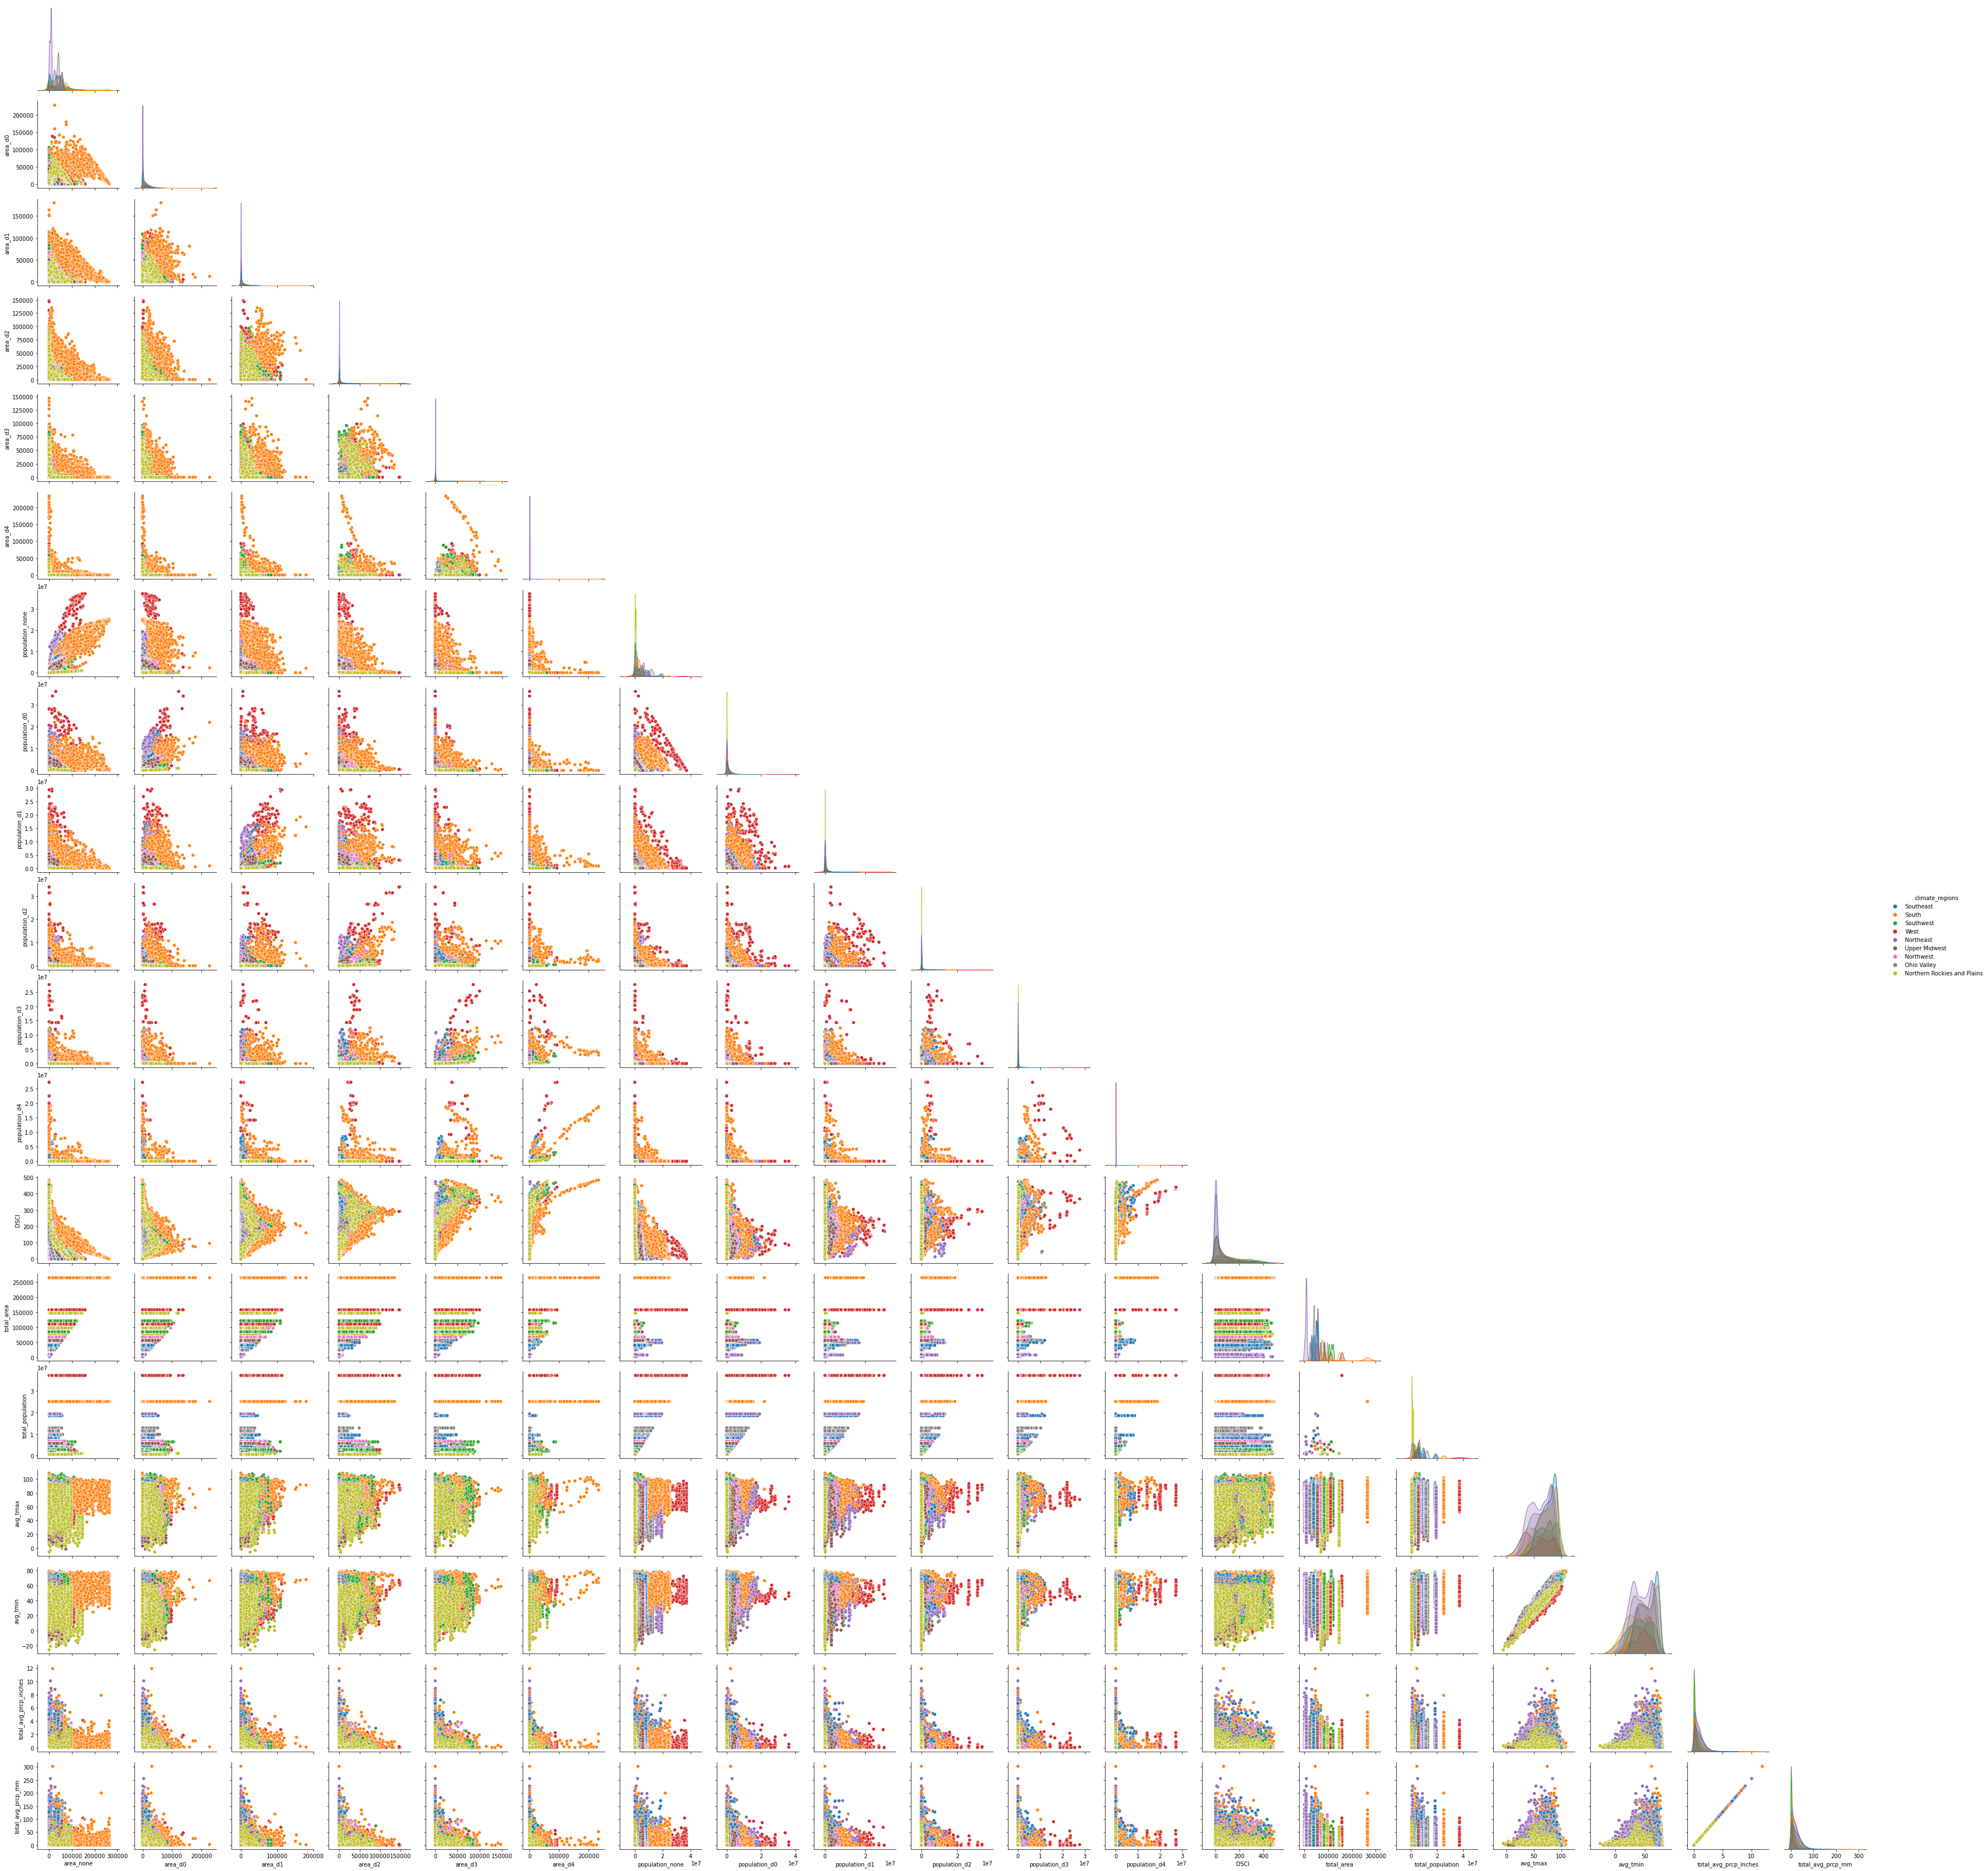

In [139]:
# sns.pairplot(drought_states,hue='climate_regions',corner=True)

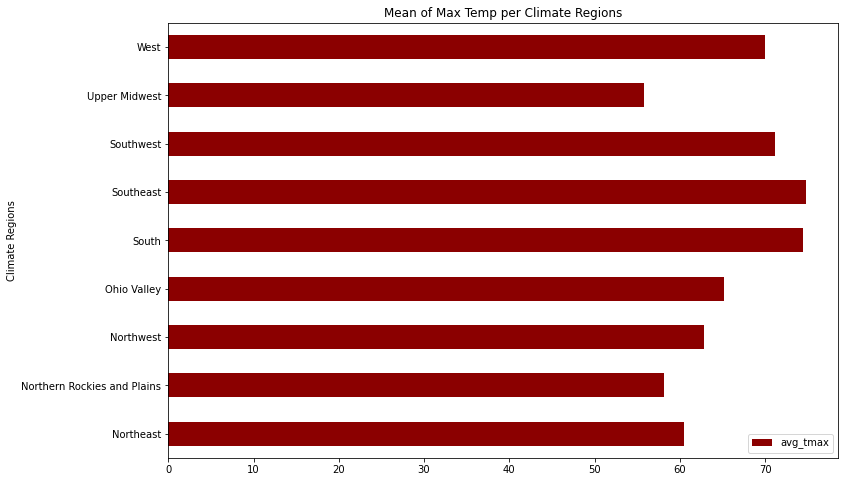

In [217]:
avg_temp_max_df=drought_states.groupby(by='climate_regions')[['avg_tmax']].mean()
ax_temp_max=avg_temp_max_df.plot(kind='barh',
                         title='Mean of Max Temp per Climate Regions',
                         xlabel='Climate Regions',
                         ylabel='Temperature',
                         color='darkred',
                        figsize=(12,8));
plt.savefig('./images/max_temp_regions.png')

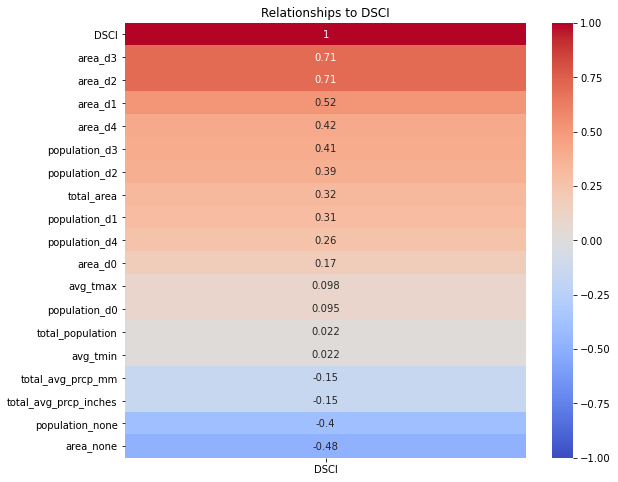

In [218]:
plt.figure(figsize=(9,8))
plt.title('Relationships to DSCI')
sns.heatmap(drought_states.corr()[['DSCI']].sort_values(by='DSCI', ascending=False),
           cmap='coolwarm',
           annot=True,
           vmin=-1,
           vmax=1);
plt.savefig('./images/heat_map.png')

## Data Visualizations

In [151]:
#function to plot column average over time.
def plot_avg(df,col):
    years = df.groupby(df['ValidEnd'].dt.year)[col].mean()
    years.plot(kind = 'bar', figsize = (10, 8))
    plt.xlabel("Year")
    plt.ylabel(col)
    


In [164]:
#function to plot column sum over time
def plot_sum(df,col):
    years = df.groupby(df['ValidEnd'].dt.year)[col].sum()
    years.plot(kind = 'bar', figsize = (10, 8))
    plt.xlabel("Year")
    plt.ylabel(col)

### Visualizations for US over time

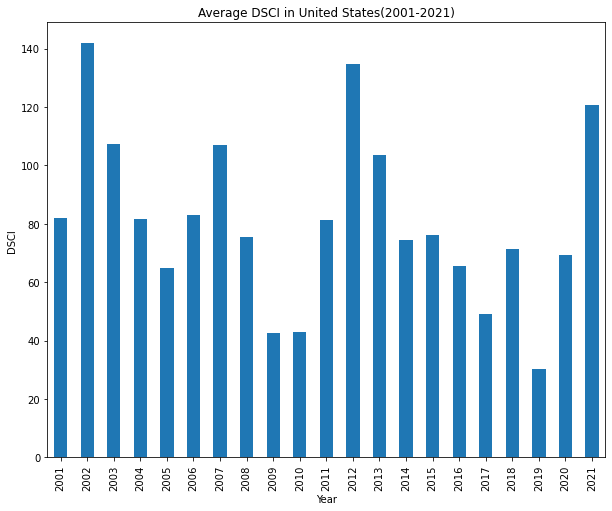

In [152]:
plt.title('Average DSCI in United States(2001-2021)')
plot_avg(drought_states,'DSCI');

In [165]:
plot_sum(drought_states,'total_avg_prcp_mm')

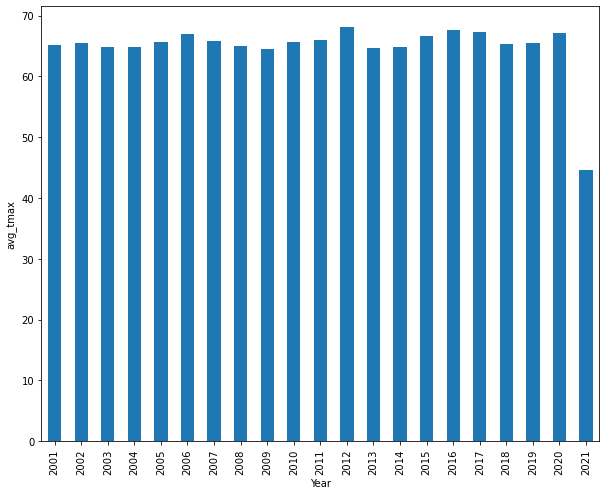

In [163]:
plot_avg(drought_states,'avg_tmax')

### Visualization over time for regions

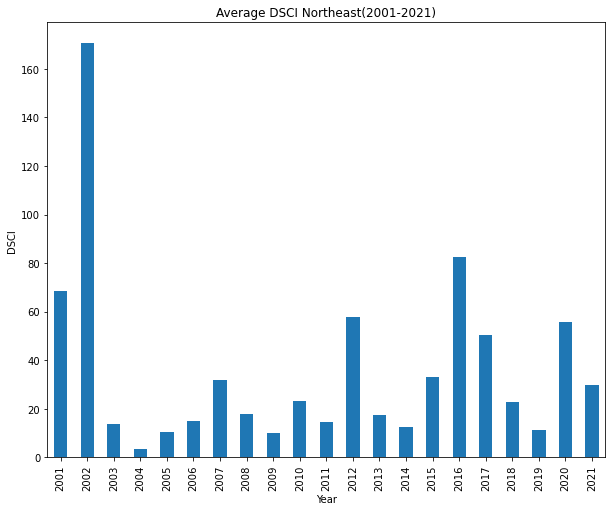

In [154]:
plt.title('Average DSCI Northeast(2001-2021)')
plot_avg(ne_df,'DSCI')

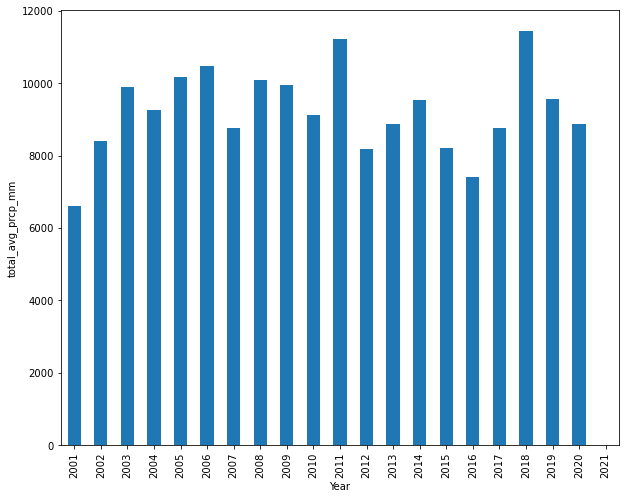

In [172]:
plot_sum(ne_df,'total_avg_prcp_mm')

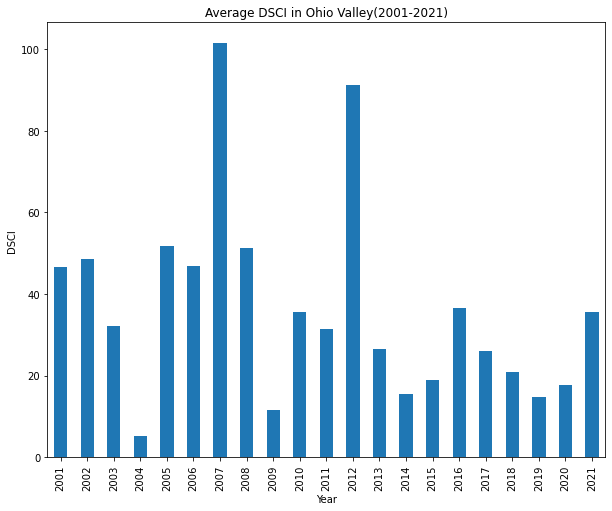

In [155]:
plt.title('Average DSCI in Ohio Valley(2001-2021)')
plot_avg(oh_df,'DSCI')

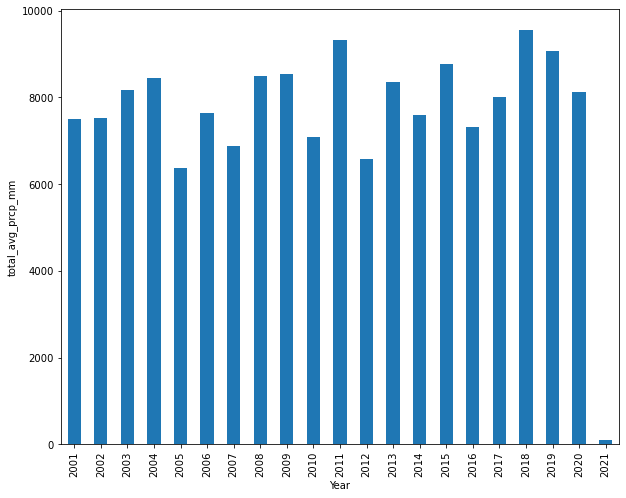

In [173]:
plot_sum(oh_df,'total_avg_prcp_mm')

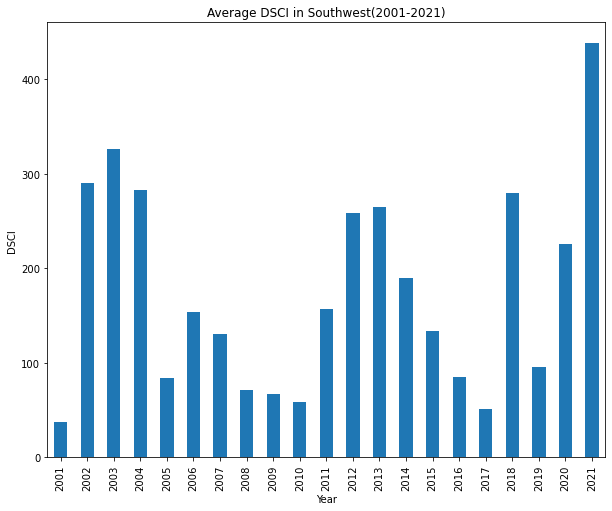

In [156]:
plt.title('Average DSCI in Southwest(2001-2021)')
plot_avg(sw_df,'DSCI')

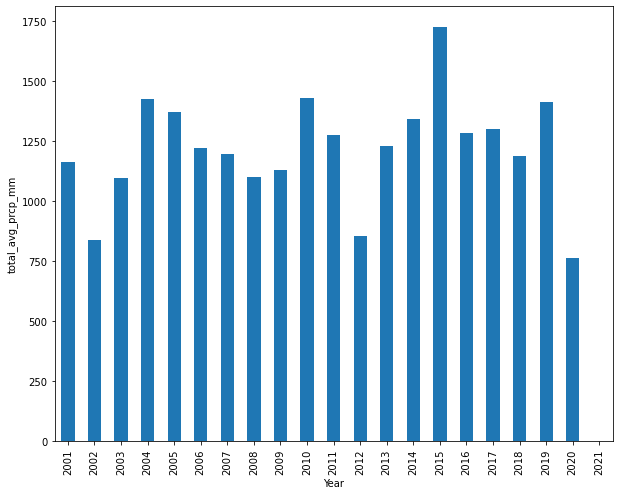

In [174]:
plot_sum(sw_df,'total_avg_prcp_mm')

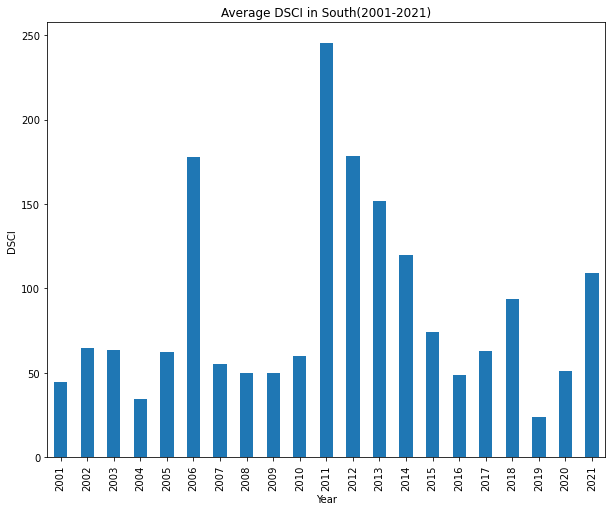

In [157]:
plt.title('Average DSCI in South(2001-2021)')
plot_avg(s_df,'DSCI')

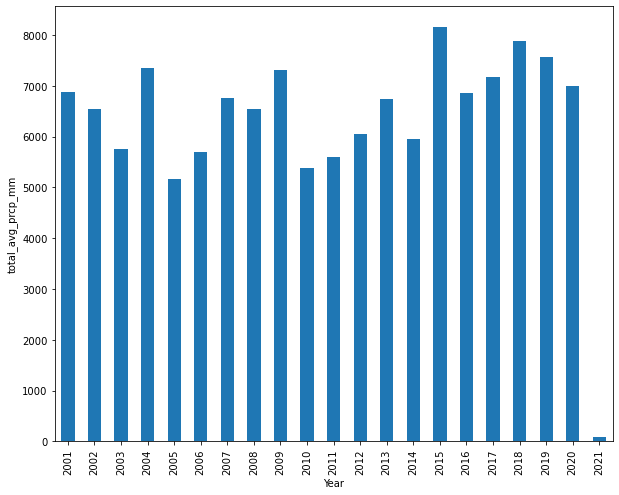

In [175]:
plot_sum(s_df,'total_avg_prcp_mm')

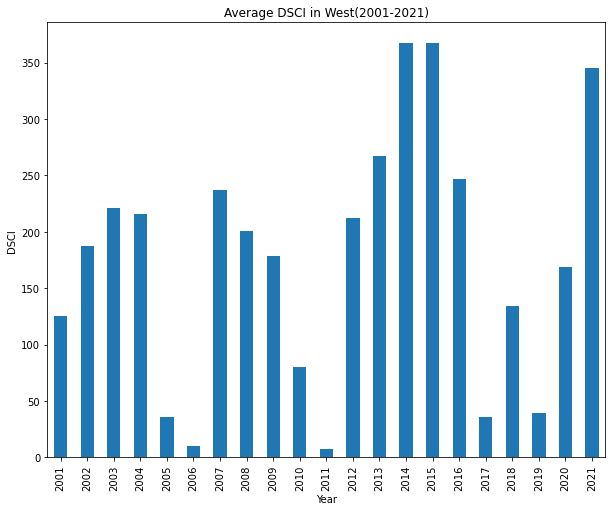

In [159]:
plt.title('Average DSCI in West(2001-2021)')
plot_avg(w_df,'DSCI')

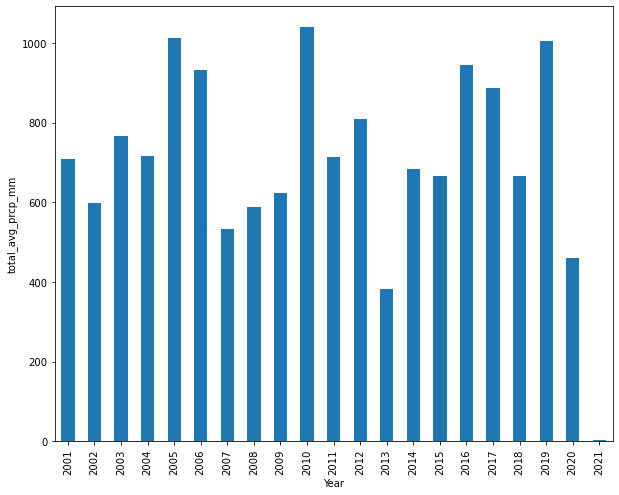

In [176]:
plot_sum(w_df,'total_avg_prcp_mm')

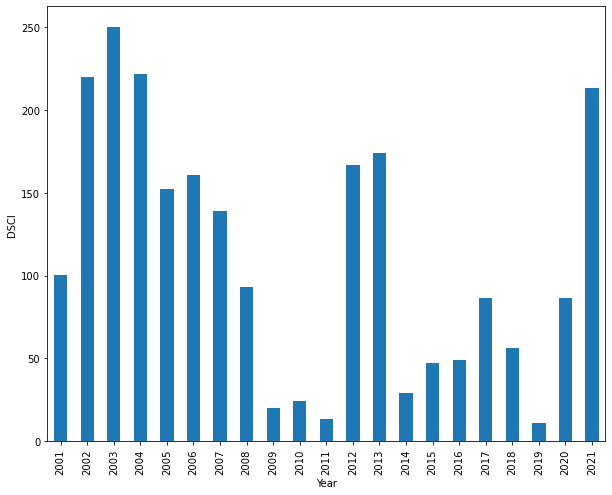

In [167]:
plot_avg(wnc_df,'DSCI')

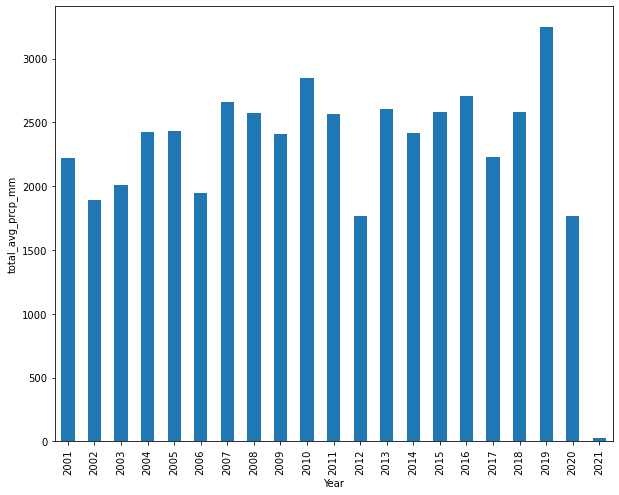

In [177]:
plot_sum(wnc_df,'total_avg_prcp_mm')

### More visualizations

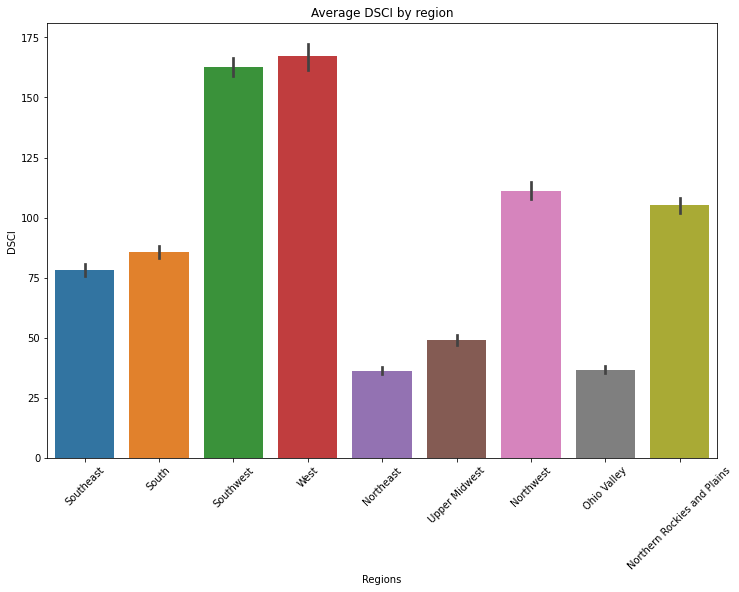

In [131]:
#graphic of the average DSCI by region
plt.figure(figsize=(12,8))
sns.barplot(x='climate_regions',
    y='DSCI',
    data=drought_states);
plt.title('Average DSCI by region',fontdict={'fontsize':12});
plt.xlabel('Regions',fontdict={'fontsize':10});
plt.xticks(rotation=45)
plt.ylabel('DSCI',fontdict={'fontsize':10})
plt.savefig('./images/avg_dsci_region.png');

In [129]:
drought_states.head(1)

ValidEnd     Name state  area_none  area_d0  area_d1  area_d2  area_d3  \
0 2021-01-04  Alabama    AL   47712.19  3892.15      0.0      0.0      0.0   

   area_d4  population_none  ...  population_d3  population_d4  DSCI  \
0      0.0       4596699.61  ...            0.0            0.0     8   

   total_area  total_population  avg_tmax  avg_tmin  total_avg_prcp_inches  \
0    51604.34        4779736.02     67.94     41.45                    0.0   

   total_avg_prcp_mm  climate_regions  
0                0.0        Southeast  

[1 rows x 23 columns]

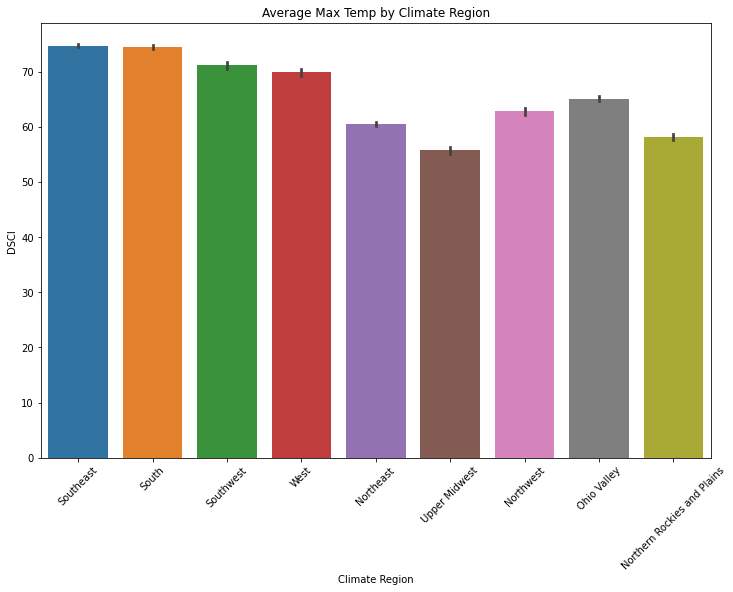

In [132]:
plt.figure(figsize=(12,8))
sns.barplot(x='climate_regions',
    y='avg_tmax',
    data=drought_states);
plt.title('Average Max Temp by Climate Region',fontdict={'fontsize':12});
plt.xlabel('Climate Region',fontdict={'fontsize':10});
plt.xticks(rotation=45)
plt.ylabel('DSCI',fontdict={'fontsize':10})
plt.savefig('./images/avg_max_temp.png');

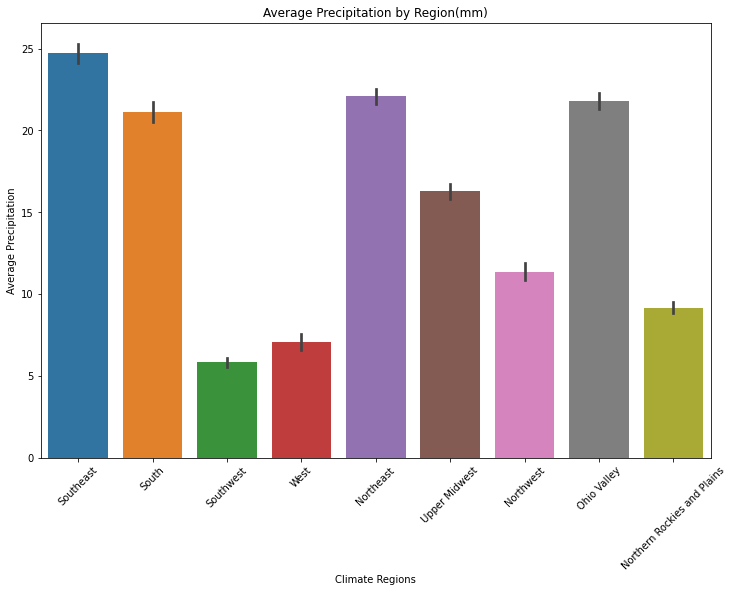

In [219]:
plt.figure(figsize=(12,8))
sns.barplot(x='climate_regions',
    y='total_avg_prcp_mm',
    data=drought_states);
plt.title('Average Precipitation by Region(mm)',fontdict={'fontsize':12});
plt.xlabel('Climate Regions',fontdict={'fontsize':10});
plt.xticks(rotation=45)
plt.ylabel('Average Precipitation',fontdict={'fontsize':10})
plt.savefig('./images/avg_prcp_mm.png');

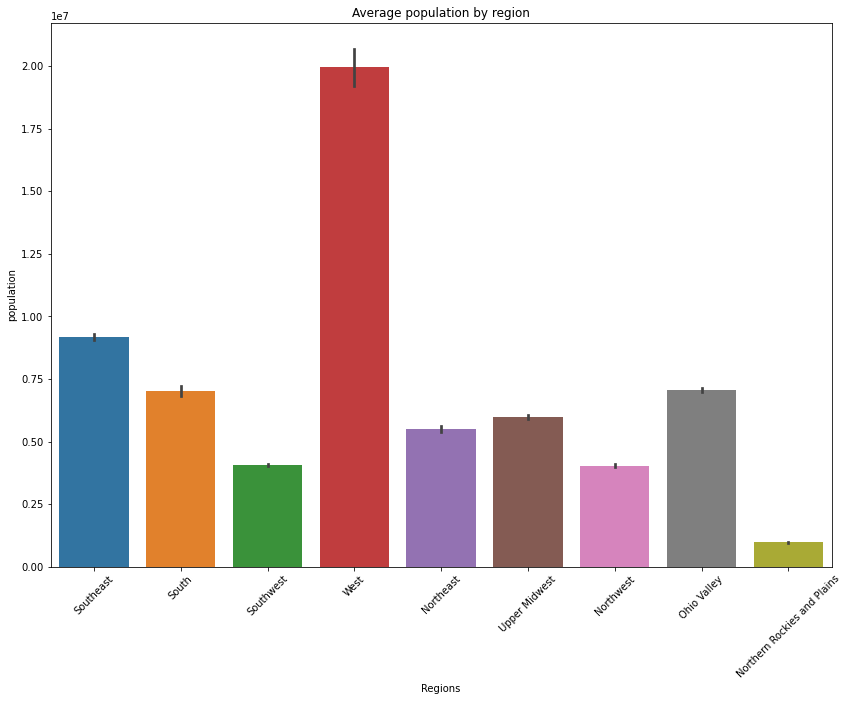

In [74]:
plt.figure(figsize=(14,10))
sns.barplot(x='climate_regions',
    y='total_population',
    data=drought_states);
plt.title('Average population by region',fontdict={'fontsize':12});
plt.xlabel('Regions',fontdict={'fontsize':10});
plt.xticks(rotation=45)
plt.ylabel('population',fontdict={'fontsize':10});

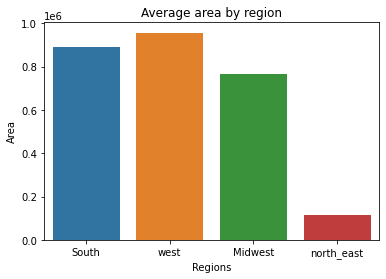

In [48]:
sns.barplot(x='Region',
    y='total_area',
    data=regions);
plt.title('Average area by region',fontdict={'fontsize':12});
plt.xlabel('Regions',fontdict={'fontsize':10});
plt.ylabel('Area',fontdict={'fontsize':10});

In [181]:
ne_df.head(1)

ValidEnd      Name state  area_none  area_d0  area_d1  area_d2  \
5225 2021-01-04  Delaware    DE    2049.97      0.0      0.0      0.0   

      area_d3  area_d4  population_none  ...  population_d3  population_d4  \
5225      0.0      0.0        897934.01  ...            0.0            0.0   

      DSCI  total_area  total_population  avg_tmax  avg_tmin  \
5225     0     2049.97         897934.01     42.45      23.0   

      total_avg_prcp_inches  total_avg_prcp_mm  climate_regions  
5225                    0.0                0.0        Northeast  

[1 rows x 23 columns]

In [222]:
def state_plots(df,col,col_name,place):
    plt.figure(figsize=(10,8))
    sns.barplot(x='Name',
    y=col,
    data=df);
    plt.title(f'Average {col_name} In {place}',fontdict={'fontsize':12});
    plt.xlabel('States',fontdict={'fontsize':10});
    plt.xticks(rotation=45)
    plt.ylabel(f'{col_name}',fontdict={'fontsize':10});

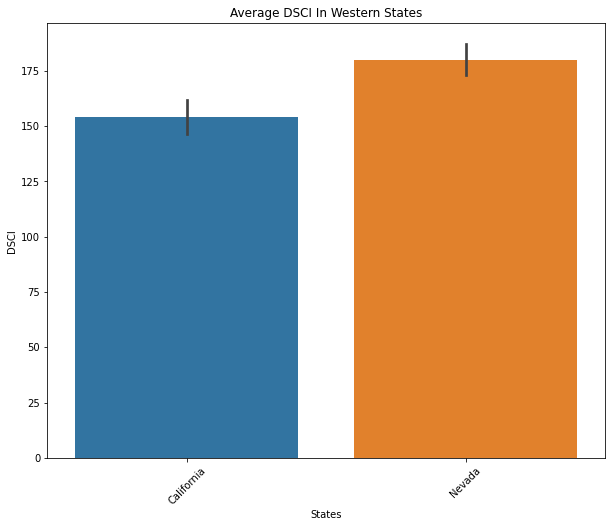

In [223]:
state_plots(w_df,'DSCI','DSCI','Western States')
#plt.savefig('./images/avg_dsci_region.png');

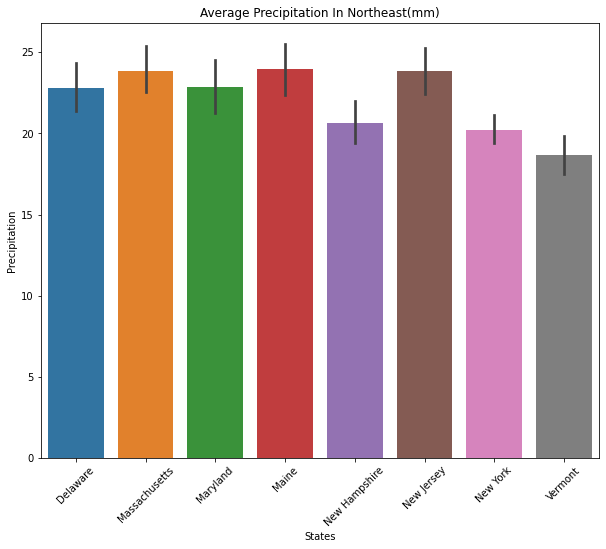

In [214]:
state_plots(ne_df,'total_avg_prcp_mm','Precipitation','Northeast(mm)')

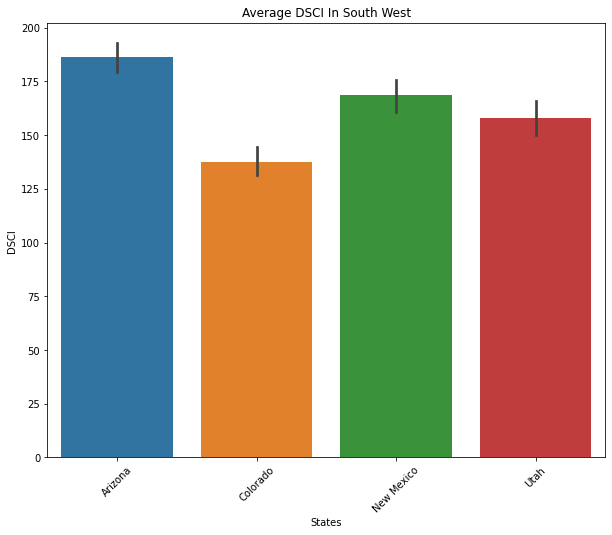

In [210]:
state_plots(sw_df,'DSCI','DSCI','South West')

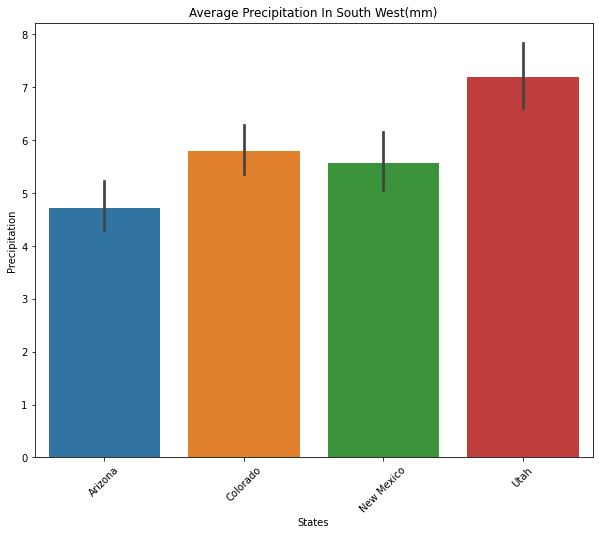

In [211]:
state_plots(sw_df,'total_avg_prcp_mm','Precipitation','South West(mm)')

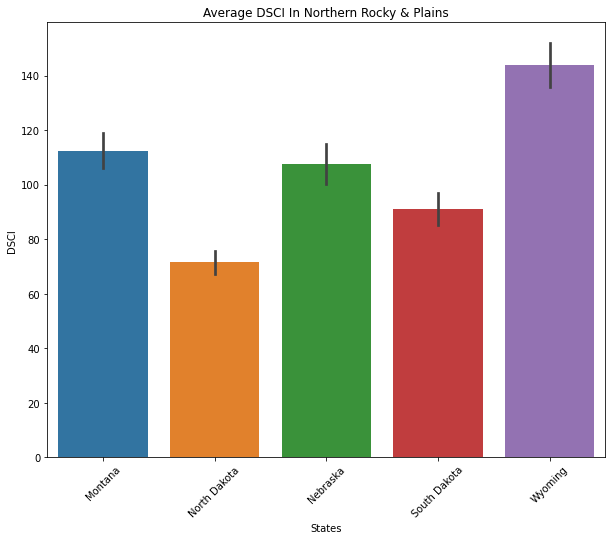

In [212]:
state_plots(wnc_df,'DSCI','DSCI','Northern Rocky & Plains')

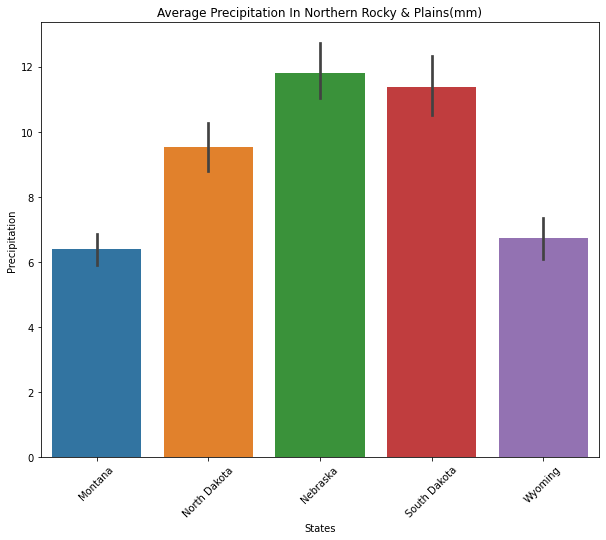

In [213]:
state_plots(wnc_df,'total_avg_prcp_mm','Precipitation','Northern Rocky & Plains(mm)')


In [51]:
# #change the format of the time of the regions
# South_df2['ValidStart']= pd.to_datetime(drought_states['ValidStart'])
# South_df2['ValidStart'] = drought_states['ValidStart'].dt.strftime('%m/%d/%Y')
# South_df2['ValidStart']=drought_states['ValidStart'].astype('datetime64[ns]')
# West_df2['ValidStart']= pd.to_datetime(drought_states['ValidStart'])
# West_df2['ValidStart'] = drought_states['ValidStart'].dt.strftime('%m/%d/%Y')
# West_df2['ValidStart']=drought_states['ValidStart'].astype('datetime64[ns]')
# midwest_df2['ValidStart']= pd.to_datetime(drought_states['ValidStart'])
# midwest_df2['ValidStart'] = drought_states['ValidStart'].dt.strftime('%m/%d/%Y')
# midwest_df2['ValidStart']=drought_states['ValidStart'].astype('datetime64[ns]')
# north_east_df2['ValidStart']= pd.to_datetime(drought_states['ValidStart'])
# north_east_df2['ValidStart'] = drought_states['ValidStart'].dt.strftime('%m/%d/%Y')
# north_east_df2['ValidStart']=drought_states['ValidStart'].astype('datetime64[ns]')

# South_df2.set_index('ValidStart',inplace=True)
# West_df2.set_index('ValidStart',inplace=True)
# midwest_df2.set_index('ValidStart',inplace=True)
# north_east_df2.set_index('ValidStart',inplace=True)


In [ ]:
region_mean=regions.groupby('Region').agg({'area_d0':'mean','area_d1':'mean','area_d2':'mean','area_d3':'mean','area_d4':'mean'})

In [ ]:
from math import pi
# Each attribute we'll plot in the radar chart.
labels = ['D0', 'D1', 'D2', 'D3', 'D4']

# Let's look at the 1970 Chevy Impala and plot it.
values = region_mean.loc['north_east'].tolist()
values1 = region_mean.loc['west'].tolist()
values2 = region_mean.loc['South'].tolist()
values3 = region_mean.loc['Midwest'].tolist()
# Number of variables we're plotting.
num_vars = len(labels)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
# values += values[:1]
# angles += angles[:1]
labels.append(labels[0])
angles.append(angles[0])
values.append(values[0])
values1.append(values1[0])
values2.append(values2[0])
values3.append(values3[0])
#ax = plt.subplot(polar=True)

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
#ax.set_thetagrids(angles * 180/np.pi, labels)
# Draw the outline of our data.
ax.set_thetagrids(np.degrees(angles), labels)
ax.plot(angles, values, color='red', linewidth=1)
ax.plot(angles, values1, color='blue', linewidth=1)
ax.plot(angles, values2, color='green', linewidth=1)
ax.plot(angles, values3, color='orange', linewidth=1)

plt.tight_layout()
plt.title('Drought categories areas Affected by region')
plt.legend(['north_east','west','South','Midwest'])
plt.show()
#https://towardsdatascience.com/how-to-create-a-radar-chart-in-python-36b9ebaa7a64

In [ ]:
region_mean_population=regions.groupby('Region').agg({'population_d0':'mean','population_d1':'mean','population_d2':'mean','population_d3':'mean','population_d4':'mean'})

In [ ]:
# Each attribute we'll plot in the radar chart.
labels = ['D0', 'D1', 'D2', 'D3', 'D4']

# Let's look at the 1970 Chevy Impala and plot it.
values = region_mean_population.loc['north_east'].tolist()
values1 = region_mean_population.loc['west'].tolist()
values2 = region_mean_population.loc['South'].tolist()
values3 = region_mean_population.loc['Midwest'].tolist()
# Number of variables we're plotting.
num_vars = len(labels)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
# values += values[:1]
# angles += angles[:1]
labels.append(labels[0])
angles.append(angles[0])
values.append(values[0])
values1.append(values1[0])
values2.append(values2[0])
values3.append(values3[0])
#ax = plt.subplot(polar=True)

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
#ax.set_thetagrids(angles * 180/np.pi, labels)
# Draw the outline of our data.
ax.set_thetagrids(np.degrees(angles), labels)
ax.plot(angles, values, color='red', linewidth=1)
ax.plot(angles, values1, color='blue', linewidth=1)
ax.plot(angles, values2, color='green', linewidth=1)
ax.plot(angles, values3, color='orange', linewidth=1)

plt.tight_layout()
plt.title('Drought categories population Affected by region')
plt.legend(['north_east','west','South','Midwest'])
plt.show()
#https://towardsdatascience.com/how-to-create-a-radar-chart-in-python-36b9ebaa7a64

## West states analysis

In [ ]:
west_df=West_df.groupby(by=[West_df['ValidStart'].dt.year,West_df['Name']])['DSCI'].agg([ 'mean'])
west_df.reset_index(inplace=True)

In [178]:
plt.figure(figsize=(15, 12))
sns.barplot(x='Name',
    y='mean',
    data=west_df);
plt.title('Average DSCI by states of west',fontdict={'fontsize':15});
plt.xticks(fontsize=(12))
plt.xlabel('States',fontdict={'fontsize':10});
plt.ylabel('DSCI',fontdict={'fontsize':10});
plt.grid(axis = 'y',color = 'black', linestyle = '--', linewidth = 0.8)

NameError: name 'west_df' is not defined

<Figure size 1080x864 with 0 Axes>

In [ ]:
plt.figure(figsize=(15, 12))
sns.barplot(x='Name',
    y='total_population',
    data=West_df);
plt.title('Average population',fontdict={'fontsize':14});
plt.xlabel('States',fontdict={'fontsize':10});
plt.ylabel('population',fontdict={'fontsize':10});
plt.grid(axis = 'y',color = 'black', linestyle = '--', linewidth = 0.8)

In [ ]:
plt.figure(figsize=(15, 12))
sns.barplot(x='Name',
    y='total_area',
    data=West_df);
plt.title('Average area',fontdict={'fontsize':14});
plt.xlabel('States',fontdict={'fontsize':10});
plt.ylabel('Area',fontdict={'fontsize':10});
plt.grid(axis = 'y',color = 'black', linestyle = '--', linewidth = 0.8)

In [ ]:
West_df2['DSCI'].plot(figsize = (12, 8))
plt.xlabel("Year")
plt.ylabel("DSCI (Severity Level)")
plt.title('Drought Severity since 2001')
plt.savefig('./images/western_dsci_years.png');

## midwest

In [ ]:
midwest=Midwest_df.groupby(by=[Midwest_df['ValidStart'].dt.year,Midwest_df['Name']])['DSCI'].agg([ 'mean'])
midwest.reset_index(inplace=True)

plt.figure(figsize=(15, 12))
sns.barplot(x='Name',
    y='mean',
    data=midwest);
plt.title('Average DSCI by states of midwest',fontdict={'fontsize':14});
plt.xlabel('States',fontdict={'fontsize':10})
plt.xticks(fontsize=(11))
plt.ylabel('DSCI',fontdict={'fontsize':10});
plt.grid(axis = 'y',color = 'black', linestyle = '--', linewidth = 0.8)

In [ ]:
midwest_df2['DSCI'].plot(figsize = (12, 8))
plt.xlabel("Year")
plt.ylabel("DSCI (Severity Level)")
plt.title('Midwest Drought Severity since 2001');